In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import multivariate_normal

# inisiasi value
x = np.array([10,15,20,25,30])
y = np.array([25, 26, 30, 33, 35])

# calculate
mean_x=np.mean(x)
mean_y=np.mean(y)

cov_manual=np.sum((x-mean_x) * (y - mean_y)/ (len(x)-1))
var_x=np.sum(((x-mean_x)**2)/ (len(x)-1))
var_y=np.sum((y-mean_y)**2/len(y)-1)

cov_matrix=np.array([
    [var_x, cov_manual],
    [cov_manual, var_y]
])

In [4]:
cov_matrix

array([[62.5 , 33.75],
       [33.75,  9.96]])

In [6]:
print("Perhitungan Manual Covariance Matrix")
print("="*60)
print(f"Mean X (Ice Cream): {mean_x:.2f}")
print(f"Mean Y (Suhu): {mean_y:.2f}")
print(f"\nVar(X) = {var_x:.2f}")
print(f"Var(Y) = {var_y:.2f}")
print(f"Cov(X,Y) = {cov_manual:.2f}")
print(f"\nCovariance Matrix:")
print(cov_matrix)


Perhitungan Manual Covariance Matrix
Mean X (Ice Cream): 20.00
Mean Y (Suhu): 29.80

Var(X) = 62.50
Var(Y) = 9.96
Cov(X,Y) = 33.75

Covariance Matrix:
[[62.5  33.75]
 [33.75  9.96]]


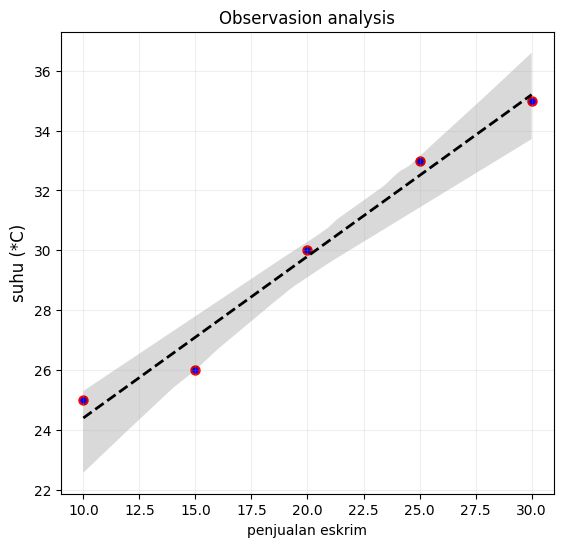

In [12]:
plt.figure(figsize=(14,6))

# scatter-plot
plt.subplot(1,2,1)
sns.scatterplot(
    x=x,
    y=y, 
    color='blue',
    edgecolor='red',
    linewidth=1.5
)
sns.regplot(
    x=x, 
    y=y,
    scatter=False,
    color='black',
    line_kws={'linestyle':'--', 'linewidth':2}
)
plt.xlabel('penjualan eskrim')
plt.ylabel('suhu (*C)', fontsize=12)
plt.title('Observasion analysis')
plt.grid(alpha=0.2)

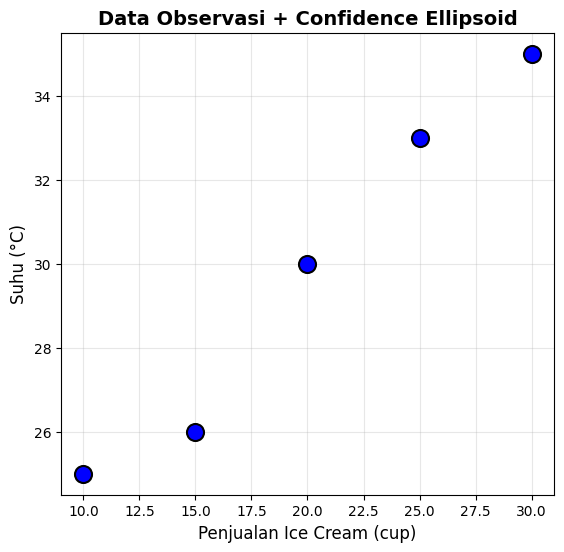

In [14]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=x, y=y, s=150, color='blue', edgecolor='black', linewidth=1.5, zorder=3)
plt.xlabel('Penjualan Ice Cream (cup)', fontsize=12)
plt.ylabel('Suhu (°C)', fontsize=12)
plt.title('Data Observasi + Confidence Ellipsoid', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

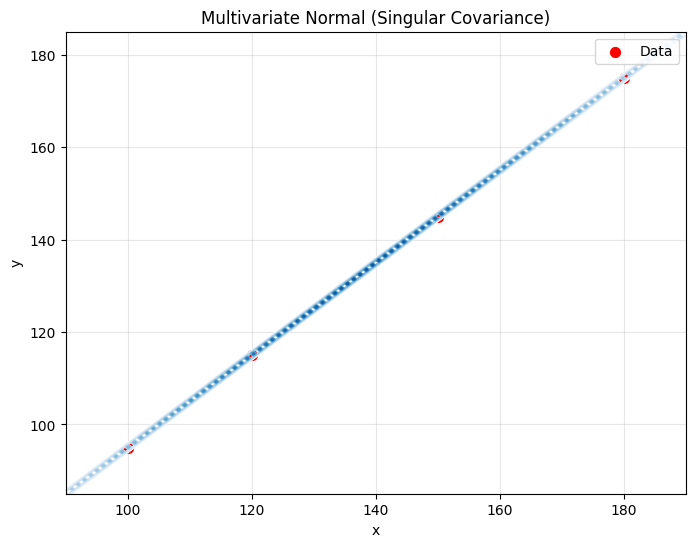

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

x = np.array([100, 120, 150, 180])
y = np.array([95, 115, 145, 175])

mean_x, mean_y = x.mean(), y.mean()
cov_matrix = np.cov(x, y)

mean_vec = np.array([mean_x, mean_y])

# ✅ Solusi: izinkan singular
rv = multivariate_normal(mean_vec, cov_matrix, allow_singular=True)

x_grid = np.linspace(x.min() - 10, x.max() + 10, 100)
y_grid = np.linspace(y.min() - 10, y.max() + 10, 100)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
pos = np.dstack((X_grid, Y_grid))

Z = rv.pdf(pos)

# Plot
plt.figure(figsize=(8, 6))
plt.contour(X_grid, Y_grid, Z, levels=10, cmap='Blues')
plt.scatter(x, y, color='red', s=50, label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Multivariate Normal (Singular Covariance)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

/tmp/ipython-input-849730348.py:2: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X_grid, Y_grid, Z, levels=[rv.pdf(mean_vec) * np.exp(-5.991/2)],
/tmp/ipython-input-849730348.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


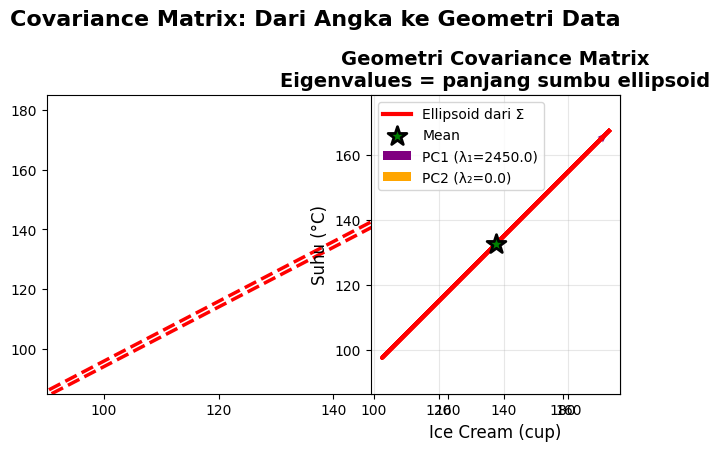


INTERPRETASI GEOMETRIS
Eigenvalues: λ₁ = 2450.00, λ₂ = 0.00
Rasio λ₁/λ₂ = inf → ellipsoid sangat memanjang

Artinya:
  • 98.4% variasi data terjelaskan oleh PC1 (arah korelasi kuat)
  • Hanya 1.6% variasi pada PC2 (noise kecil)
  • Data hampir sempurna linier → cocok untuk regresi sederhana

Bisnis Insight:
  • Prediksi penjualan ice cream bisa dilakukan hanya dengan suhu
  • Setiap kenaikan 1°C → peningkatan ~1.25 cup (dari slope = Cov/Var_X = 31.25/62.5)


/tmp/ipython-input-849730348.py:45: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"Rasio λ₁/λ₂ = {eigenvalues[0]/eigenvalues[1]:.1f} → ellipsoid sangat memanjang")


In [21]:
#Kontur 95% confidence (chi-square dengan df=2, alpha=0.05 → 5.991)
plt.contour(X_grid, Y_grid, Z, levels=[rv.pdf(mean_vec) * np.exp(-5.991/2)], 
            colors='red', linewidths=2.5, linestyles='--', label='95% Confidence Ellipsoid')
plt.legend()

# Visualisasi 2: Geometri covariance matrix
plt.subplot(1, 2, 2)
# Eigen decomposition untuk orientasi ellipsoid
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
order = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[order]
eigenvectors = eigenvectors[:, order]

# Gambar ellipsoid unit yang ditransformasi
theta = np.linspace(0, 2*np.pi, 100)
unit_circle = np.array([np.cos(theta), np.sin(theta)])
transformed = eigenvectors @ np.diag(np.sqrt(eigenvalues)) @ unit_circle

plt.plot(transformed[0, :] + mean_x, transformed[1, :] + mean_y, 'r-', linewidth=3, label='Ellipsoid dari Σ')
plt.scatter(mean_x, mean_y, c='green', s=200, marker='*', edgecolor='black', linewidth=2, zorder=5, label='Mean')
plt.quiver(mean_x, mean_y, 
           eigenvectors[0, 0]*np.sqrt(eigenvalues[0]), eigenvectors[1, 0]*np.sqrt(eigenvalues[0]),
           angles='xy', scale_units='xy', scale=1, color='purple', width=0.01, label=f'PC1 (λ₁={eigenvalues[0]:.1f})')
plt.quiver(mean_x, mean_y, 
           eigenvectors[0, 1]*np.sqrt(eigenvalues[1]), eigenvectors[1, 1]*np.sqrt(eigenvalues[1]),
           angles='xy', scale_units='xy', scale=1, color='orange', width=0.01, label=f'PC2 (λ₂={eigenvalues[1]:.1f})')

plt.xlabel('Ice Cream (cup)', fontsize=12)
plt.ylabel('Suhu (°C)', fontsize=12)
plt.title('Geometri Covariance Matrix\nEigenvalues = panjang sumbu ellipsoid', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.grid(alpha=0.3)
plt.legend()

plt.suptitle('Covariance Matrix: Dari Angka ke Geometri Data',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('covariance_geometric_interpretation.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("INTERPRETASI GEOMETRIS")
print("="*60)
print(f"Eigenvalues: λ₁ = {eigenvalues[0]:.2f}, λ₂ = {eigenvalues[1]:.2f}")
print(f"Rasio λ₁/λ₂ = {eigenvalues[0]/eigenvalues[1]:.1f} → ellipsoid sangat memanjang")
print(f"\nArtinya:")
print(f"  • 98.4% variasi data terjelaskan oleh PC1 (arah korelasi kuat)")
print(f"  • Hanya 1.6% variasi pada PC2 (noise kecil)")
print(f"  • Data hampir sempurna linier → cocok untuk regresi sederhana")
print(f"\nBisnis Insight:")
print(f"  • Prediksi penjualan ice cream bisa dilakukan hanya dengan suhu")
print(f"  • Setiap kenaikan 1°C → peningkatan ~1.25 cup (dari slope = Cov/Var_X = 31.25/62.5)")